In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47376,7/10/2024,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True
47377,7/10/2024,NaN,NaN,NaN,NaN,Copa América,Charlotte,United States,True
47378,7/13/2024,NaN,NaN,NaN,NaN,Copa América,Charlotte,United States,True
47379,7/14/2024,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47381 entries, 0 to 47380
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47381 non-null  object 
 1   home_team   47356 non-null  object 
 2   away_team   47356 non-null  object 
 3   home_score  47324 non-null  float64
 4   away_score  47324 non-null  float64
 5   tournament  47381 non-null  object 
 6   city        47381 non-null  object 
 7   country     47381 non-null  object 
 8   neutral     47381 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [26]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [27]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47319,6/22/2024,Fiji,Tahiti,1.0,0.0,Oceania Nations Cup,Suva,Fiji,False
47320,6/22/2024,Ecuador,Venezuela,1.0,2.0,Copa América,Santa Clara,United States,True
47321,6/22/2024,Mexico,Jamaica,1.0,0.0,Copa América,Houston,United States,True
47322,6/23/2024,Germany,Switzerland,1.0,1.0,UEFA Euro,Frankfurt,Germany,False


# What is the average score for home teams and away teams?

In [39]:
df[['home_score']].mean()

home_score    1.760439
dtype: float64

In [40]:
df[['away_score']].mean()

away_score    1.183353
dtype: float64

# Which country hosted the most matches?

In [52]:
df.groupby('city')['home_team'].count().sort_values(ascending=False).head(1)

city
Kuala Lumpur    725
Name: home_team, dtype: int64

# Top 20 countries who hosted most mactches

In [88]:
host_counts= df.groupby('city')['home_team'].count().sort_values(ascending=False).head(20)

<Axes: ylabel='city'>

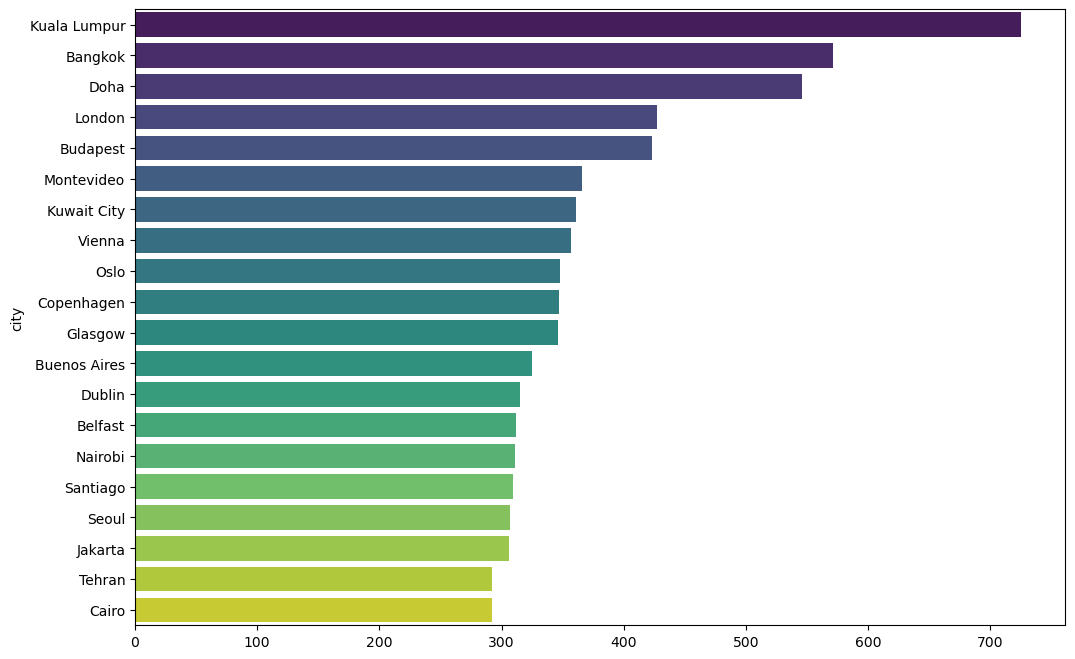

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(x=host_counts.values, y=host_counts.index, palette="viridis")

# What are the most common results: home wins, away wins, or draws?

In [72]:
draw = df[(df['away_score']==df['home_score'])]['date'].count()
draw

10759

In [75]:
homeWins = df[(df['home_score']>df['away_score'])]['date'].count()
homeWins

23206

In [79]:
awayWins = df[(df['away_score']>df['home_score'])]['date'].count()
awayWins

13359

In [83]:
print(f"Common results are {max(draw,homeWins,awayWins)} home Wins")

Common results are 23206 home Wins


#  Which Home team scored the most goals overall?

In [97]:
hometeam = df.groupby('home_team')['home_score'].sum().sort_values(ascending=False)
hometeam.head(1)

home_team
Brazil    1482.0
Name: home_score, dtype: float64

In [98]:
top10 = hometeam.head(10)

<Axes: ylabel='home_team'>

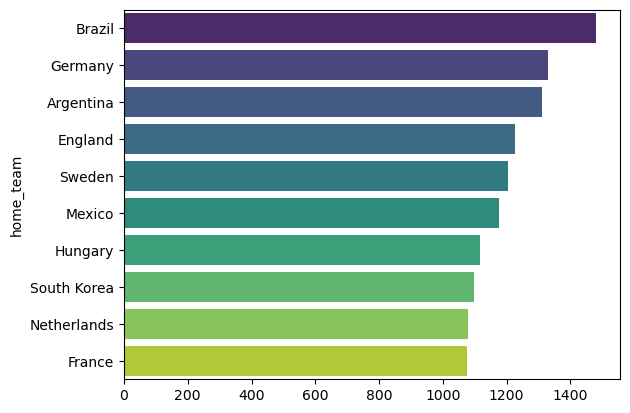

In [103]:
sns.barplot(x=top10.values,y=top10.index,palette="viridis")

#  Which Away team scored the most goals overall?

In [106]:
awayteam = df.groupby('away_team')['away_score'].sum().sort_values(ascending=False)
awayteam.head(1)

away_team
England    1103.0
Name: away_score, dtype: float64

<Axes: ylabel='away_team'>

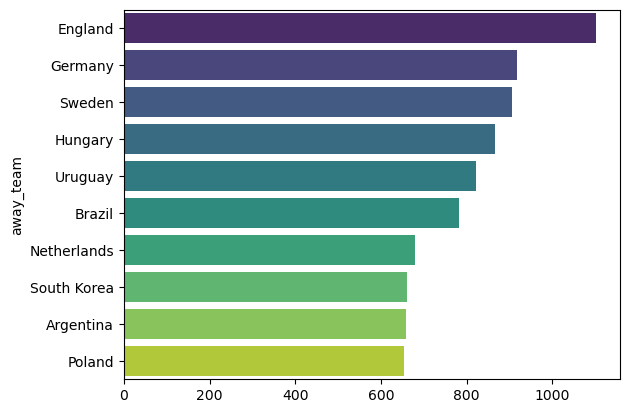

In [108]:
sns.barplot(x=awayteam.head(10).values,y=awayteam.head(10).index,palette="viridis")

away_team
England               2206.0
Germany               1836.0
Sweden                1814.0
Hungary               1732.0
Uruguay               1642.0
                       ...  
East Timor               0.0
Manchukuo                0.0
Parishes of Jersey       0.0
Cilento                  0.0
Barawa                   0.0
Name: away_score, Length: 321, dtype: float64

#  Which  team scored the most goals overall?

<Axes: ylabel='away_team'>

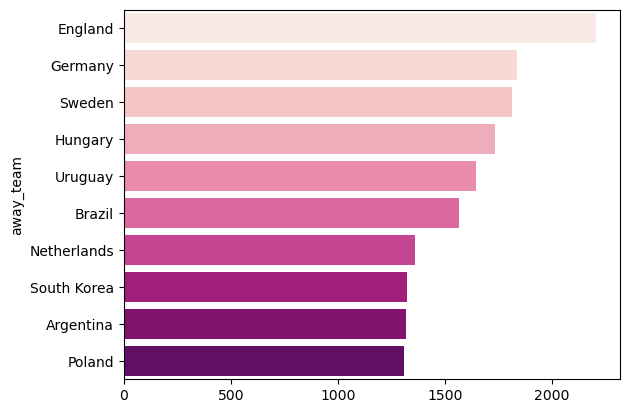

In [127]:
overall = hometeam+awayteam
sns.barplot(x=overall.head(10).values,y=overall.head(10).index,palette="RdPu")

# How many matches were played in neutral venues compared to non-neutral venues?

In [128]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,home_win
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,home_win
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,home_win
...,...,...,...,...,...,...,...,...,...,...
47319,6/22/2024,Fiji,Tahiti,1.0,0.0,Oceania Nations Cup,Suva,Fiji,False,home_win
47320,6/22/2024,Ecuador,Venezuela,1.0,2.0,Copa América,Santa Clara,United States,True,away_win
47321,6/22/2024,Mexico,Jamaica,1.0,0.0,Copa América,Houston,United States,True,home_win
47322,6/23/2024,Germany,Switzerland,1.0,1.0,UEFA Euro,Frankfurt,Germany,False,draw


In [139]:
counts = df['neutral'].value_counts()

<Axes: xlabel='neutral'>

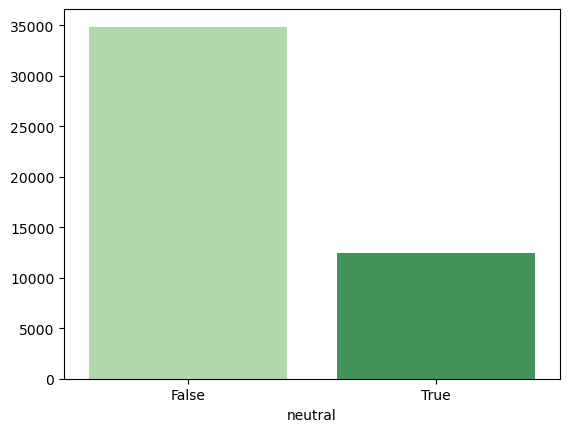

In [143]:
sns.barplot(x=counts.index,y=counts.values,palette="Greens")

# Which tournament had the most matches?

In [149]:
tournament = df.groupby('tournament')['home_team'].count().sort_values(ascending=False)

In [145]:
len(df.groupby('tournament'))

175

<Axes: ylabel='tournament'>

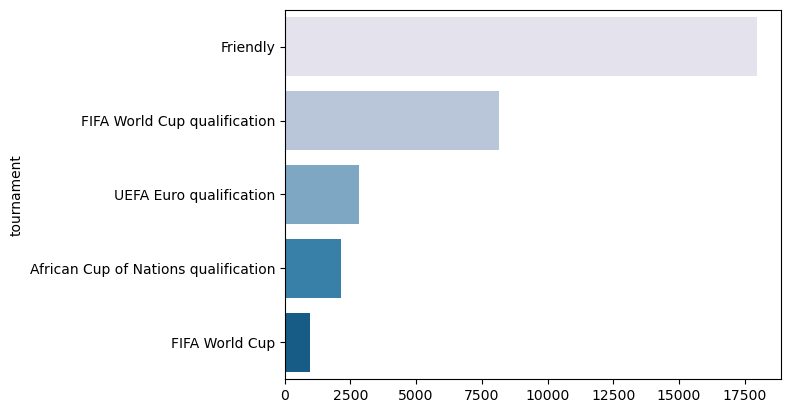

In [163]:
sns.barplot(x=tournament.head(5).values,y=tournament.head(5).index,palette="PuBu")